<a href="https://colab.research.google.com/github/AndriiVasylenkoML/image-preprocessing/blob/main/image_processing_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Processing in Python
Image processing in Python is a rapidly growing field with a wide range of applications. It is used in a variety of industries, including Computer vision, medical imaging, security, etc.

## What is Image Processing?
Image processing is the field of study and application that deals with modifying and analyzing digital images using computer algorithms. The goal of image processing is to enhance the visual quality of images, extract useful information, and make images suitable for further analysis or interpretation.
## Image Processing Using OpenCV
OpenCV (Open Source Computer Vision) is a powerful and widely-used library for image processing and computer vision tasks. It provides a comprehensive set of functions and tools that facilitate the development of applications dealing with images and videos.

While taking photographs is as simple as pressing a button, processing and improving those images sometimes takes more than a few lines of code. That’s where image processing libraries like OpenCV come into play. OpenCV is a popular open-source package that covers a wide range of image processing and computer vision capabilities and methods. It supports multiple programming languages including Python, C++, and Java. OpenCV is highly tuned for real-time applications and has a wide range of capabilities.




## Image Resizing
Scaling operations increase or reduce the size of an image.

The cv2.resize() function is used to resize an python image in OpenCV. It takes the following arguments:

```
cv2.resize(src, dsize,interpolation)
Here,
src          :The image to be resized.
dsize        :The desired width and height of the resized image.
interpolation:The interpolation method to be used.
```
* When the python image is resized, the interpolation method defines how the new pixels are computed. There are several interpolation techniques, each of which has its own quality vs. speed trade-offs.
* It is important to note that resizing an image can reduce its quality. This is because the new pixels are calculated by interpolating between the existing pixels, and this can introduce some blurring.




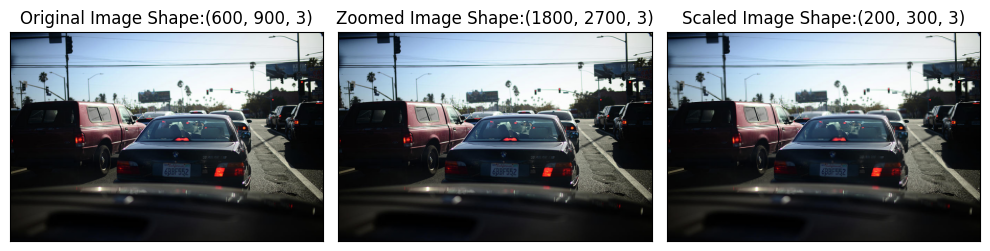

In [ ]:
# Import the necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("car.jpg")

# Convert BGR image to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define the scale factor
# Increase the size by 3 times
scale_factor_1 = 3.0
# Decrease the sizeby 3 times
scale_factor_2 = 1/3.0

# Get the original image dimensions
height, width = image_rgb.shape[:2]

# Calculate the new image dimesions
new_height = int(height * scale_factor_1)
new_width = int(width * scale_factor_1)

# Resize the image
zoomed_image = cv2.resize(src = image_rgb,
                          dsize = (new_width, new_height),
                          interpolation=cv2.INTER_CUBIC)

# Calculate the new image dimesions
new_height1 = int(height * scale_factor_2)
new_width1 = int(width * scale_factor_2)

# Scaled image
scaled_image = cv2.resize(src = image_rgb,
                          dsize = (new_width1, new_height1),
                          interpolation = cv2.INTER_AREA)

# Create subplots
fix, axs  = plt.subplots(1, 3, figsize = (10, 4))

# Plot the original Image
axs[0].imshow(image_rgb)
axs[0].set_title("Original Image Shape:" +str(image_rgb.shape))

# Plot the Zoomed Image
axs[1].imshow(zoomed_image)
axs[1].set_title("Zoomed Image Shape:" +str(zoomed_image.shape))

# Plot hte Scaled Image
axs[2].imshow(scaled_image)
axs[2].set_title("Scaled Image Shape:" +str(scaled_image.shape))

# Remove ticks from the subplots
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

# Display the subplots
plt.tight_layout()
plt.show()

In [ ]:
!pip freeze > reqwirements.txt

## Image Rotation
Images can be rotated to any degree clockwise or otherwise. We just need to define rotation matrix listing rotation point, degree of rotation and the scaling factor.

* The cv2.getRotationMatrix2D()
function is used to create a rotation matrix for an image. It takes the following arguments:
    * The center of rotation for the image.
    * The angle of rotation in degrees.
    * The scale factor.
* The cv2.warpAffine() function is used to apply a transformation matrix to an image. It takes the following arguments:
    * The python image to be transformed.
    * The transformation matrix.
    * The output image size.
* The rotation angle can be positive or negative. A positive angle rotates the image clockwise, while a negative angle rotates the image counterclockwise.
* The scale factor can be used to scale the image up or down. A scale factor of 1 will keep the image the same size, while a scale factor of 2 will double the size of the python image.




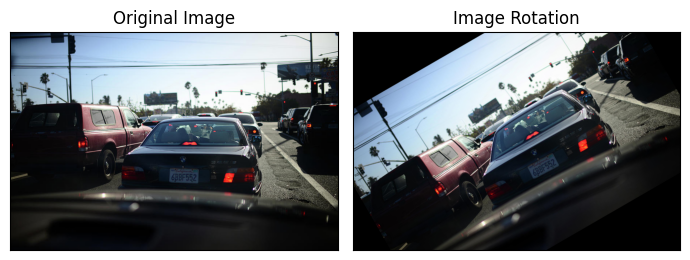

In [ ]:
# Import the necessary Libraries
import cv2
import matplotlib.pyplot as plt

# Read image from disk.
img = cv2.imread('car.jpg')

# Convert BGR image to RGB
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Image rotation parameter
center = (image_rgb.shape[1] // 2, image_rgb.shape[0] // 2)
angle = 30
scale = 1

# getRotationMatrix2D creates a matrix needed for transformation.
rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)

# We want matrix for rotation w.r.t center to 30 degree without scaling.
rotated_image = cv2.warpAffine(image_rgb, rotation_matrix,
                               (img.shape[1], img.shape[0]))
# Create subplots
fig, axs = plt.subplots(1, 2, figsize = (7, 4))

# Plot the original image
axs[0].imshow(image_rgb)
axs[0].set_title("Original Image")

# Plot the Rotated image
axs[1].imshow(rotated_image)
axs[1].set_title("Image Rotation")

# Remove ticks from the sublopts
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

# Display the subplots
plt.tight_layout()
plt.show()

## Image Translation
Translating an image means shifting it within a given frame of reference that can be along the x-axis and y-axis.

* To translate an image using OpenCV, we need to create a transformation matrix. This matrix is a 2×3 matrix that specifies the amount of translation in each direction.
* The cv2.warpAffine() function is used to apply a transformation matrix to an image. It takes the following arguments:
    * The image to be transformed.
    * The transformation matrix.
    * The output image size.
* The translation parameters are specified in the transformation matrix as the tx and ty elements. The tx element specifies the amount of translation in the x-axis, while the ty element specifies the amount of translation in the y-axis.




In [ ]:
# import the necessary Libraries
import cv2
import matplotlib.pyplot as plt

# Read image from disk.
img = cv2.imread("car.jpg")
# Convert BGR image to RGB
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

width = image_rgb.shape[1]
height = image_rgb.shape[0]

tx = 100
ty = 70

# Translation matrix
translation_matrix = np.array([[1, 0, tx], [0, 1, ty]],
                              dtype=np.float32)
# warpAffine does appropriate shifting given the Tranlation matrix.


Image shearing is a geometric transformation that skews an image along one or both axes i.e x or y axis.

- To shear an image using OpenCV, we need to create a transformation matrix. This matrix is a 2×3 matrix that specifies the amount of shearing in each direction.
- The cv2.warpAffine() function is used to apply a transformation matrix to an
image. It takes the following arguments:
    - The image to be transformed.
    - The transformation matrix.
    - The output image size.
- The shearing parameters are specified in the transformation matrix as the shearX shearY elements. The shearX element specifies the amount of shearing in the x-axis, while the shearY element specifies the amount of shearing in the y-axis.

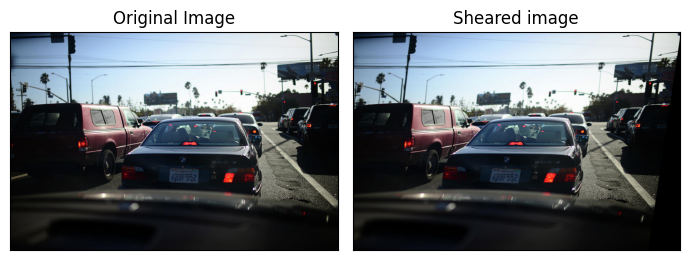

In [1]:
# Import the necessary Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('car.jpg')

# Convert BGR image to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Image shape along X and Y
width = image_rgb.shape[1]
height = image_rgb.shape[0]

# Define the Shearing factor
shearX = -0.15
shearY = 0

# Define the Transformation matrix for shearing
transformation_matrix = np.array([[1, shearX, 0],
                                  [0, 1, shearY]], dtype=np.float32)
# Apply shearing
sheared_image = cv2.warpAffine(image_rgb, transformation_matrix, (width, height))

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(7, 4))

# Plot the original image
axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')

# Plot the Sheared image
axs[1].imshow(sheared_image)
axs[1].set_title('Sheared image')

# Remove ticks from the subplots
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

# Display the subplots
plt.tight_layout()
plt.show()
